# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [138]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [139]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [140]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [60]:
def get_dataframe_info(df):
    shape = df.shape
    columns = df.columns.tolist()
    nan_values = df.isna().sum()
    duplicates = df.duplicated().sum()
    return shape, columns, nan_values, duplicates

In [61]:
info_hh_income = get_dataframe_info(df_hh_income)
info_pct_poverty = get_dataframe_info(df_pct_poverty)
info_pct_completed_hs = get_dataframe_info(df_pct_completed_hs)
info_share_race_city = get_dataframe_info(df_share_race_city)
info_fatalities = get_dataframe_info(df_fatalities)

In [62]:

dfs_info = {
    "df_hh_income": info_hh_income,
    "df_pct_poverty": info_pct_poverty,
    "df_pct_completed_hs": info_pct_completed_hs,
    "df_share_race_city": info_share_race_city,
    "df_fatalities": info_fatalities
}

for df_name, info in dfs_info.items():
    print(f"DataFrame: {df_name}")
    print(f"Shape: {info[0]}")
    print(f"Columns: {info[1]}")
    print(f"NaN Values:\n{info[2]}")
    print(f"Duplicate Rows: {info[3]}\n")

DataFrame: df_hh_income
Shape: (29322, 3)
Columns: ['Geographic Area', 'City', 'Median Income']
NaN Values:
Geographic Area     0
City                0
Median Income      51
dtype: int64
Duplicate Rows: 0

DataFrame: df_pct_poverty
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'poverty_rate']
NaN Values:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Duplicate Rows: 0

DataFrame: df_pct_completed_hs
Shape: (29329, 3)
Columns: ['Geographic Area', 'City', 'percent_completed_hs']
NaN Values:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Duplicate Rows: 0

DataFrame: df_share_race_city
Shape: (29268, 7)
Columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
NaN Values:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispa

## Data Cleaning - Check for Missing Values and uplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [63]:
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')
df_hh_income.dropna(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [64]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.dropna(inplace=True)
df_poverty_rate = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False).reset_index()

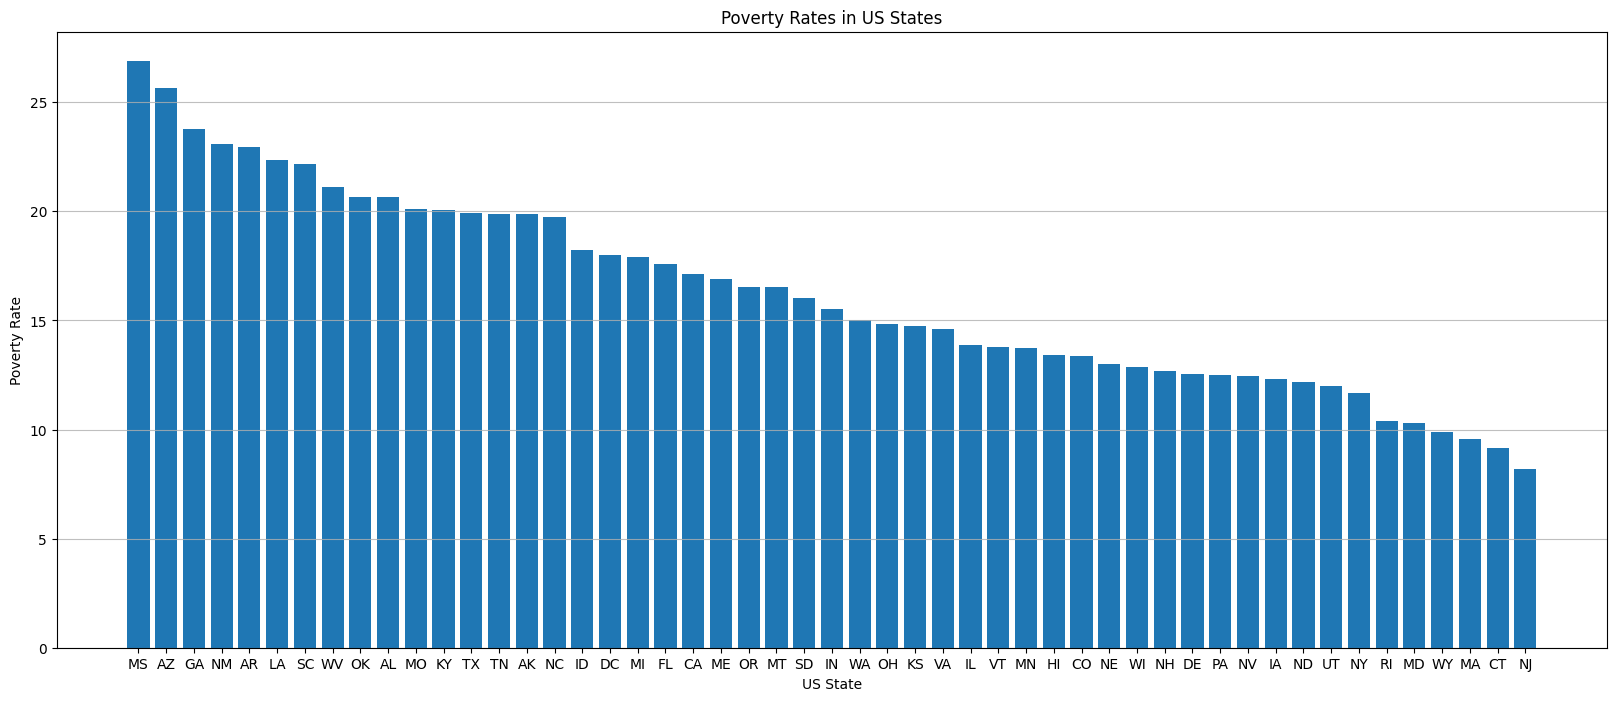

In [65]:
plt.figure(figsize=(20, 8))
plt.bar(df_poverty_rate['Geographic Area'], df_poverty_rate['poverty_rate'])
plt.xlabel("US State")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rates in US States")
plt.grid(axis='y', alpha=0.8)
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [66]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.dropna(inplace=True)
df_hs_graduation_rate = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values().reset_index()

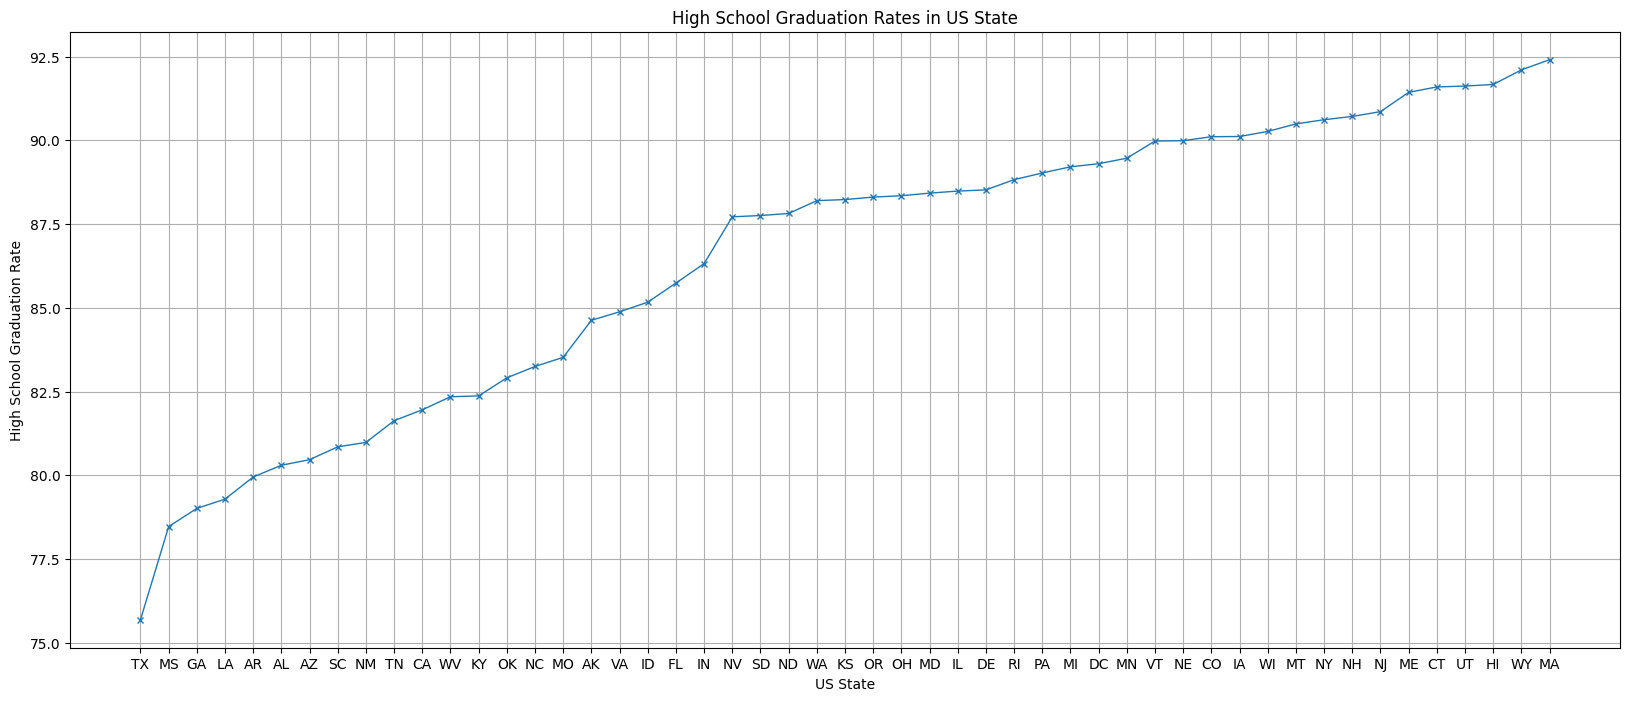

In [67]:
plt.figure(figsize=(20, 8))
plt.plot(df_hs_graduation_rate['Geographic Area'], df_hs_graduation_rate['percent_completed_hs'], linestyle='-', marker='x', markersize=5, linewidth=1)
plt.xlabel("US State")
plt.ylabel("High School Graduation Rate")
plt.title("High School Graduation Rates in US State")
plt.grid(True)
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [68]:
df_merged_poverty_graduation = df_poverty_rate.merge(df_hs_graduation_rate, on='Geographic Area')
df_merged_poverty_graduation.sort_values('percent_completed_hs', ascending=False, inplace=True)

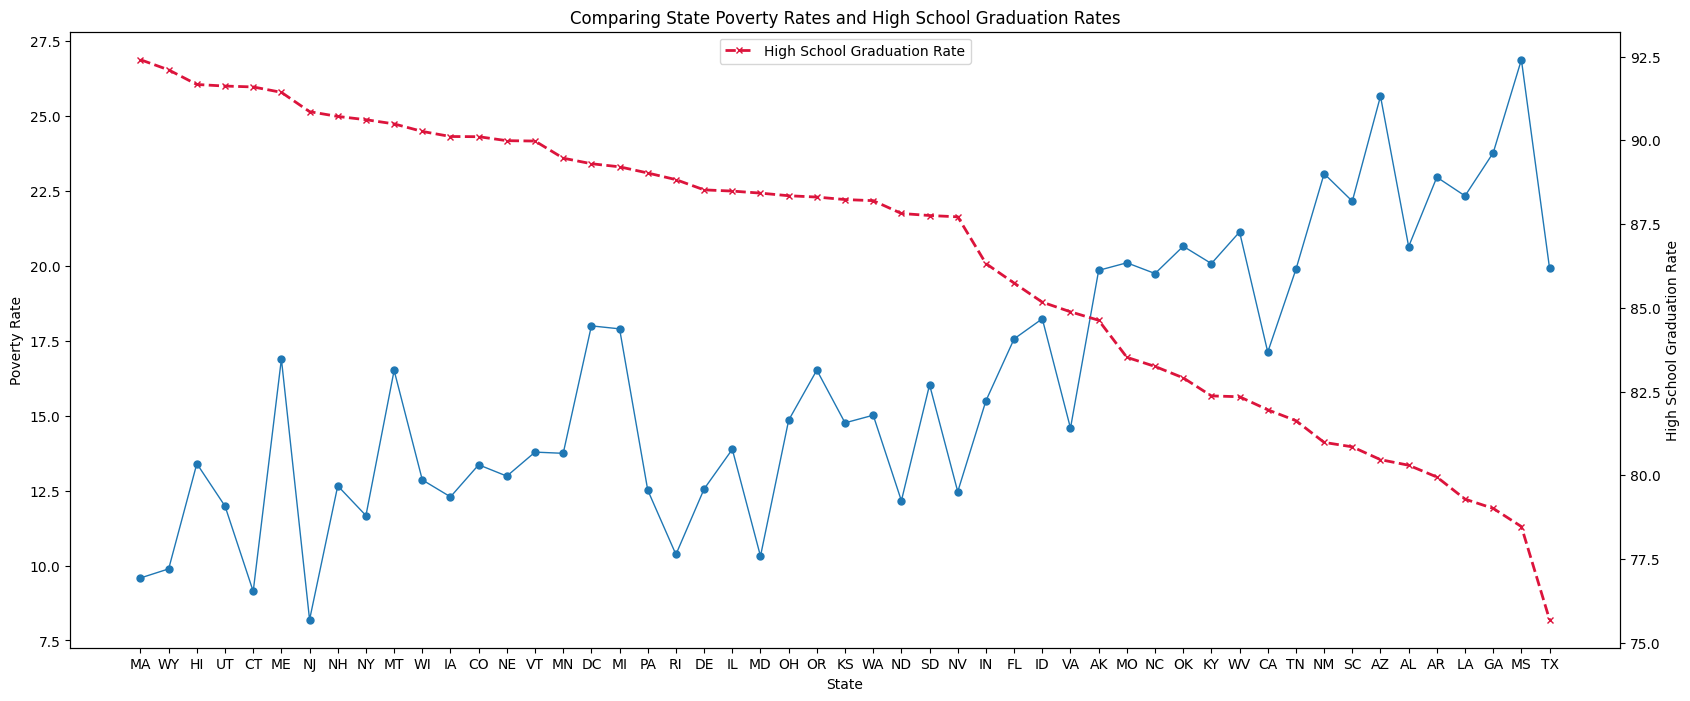

In [69]:
plt.figure(figsize=(20,8))
plt.title('Comparing State Poverty Rates and High School Graduation Rates')

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df_merged_poverty_graduation['Geographic Area'], df_merged_poverty_graduation['poverty_rate'], label='Poverty Rate', linestyle='-', marker='o', markersize=5, linewidth=1)

ax2.plot(df_merged_poverty_graduation['Geographic Area'], df_merged_poverty_graduation['percent_completed_hs'], color='crimson', label='High School Graduation Rate', linestyle='--', marker='x', markersize=5, linewidth=2)

ax.set_ylabel('Poverty Rate')
ax.set_xlabel('State')
ax2.set_ylabel('High School Graduation Rate')

plt.legend(loc='upper center')
ax.yaxis.grid(False)
ax2.grid(False)
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 2400x1000 with 0 Axes>

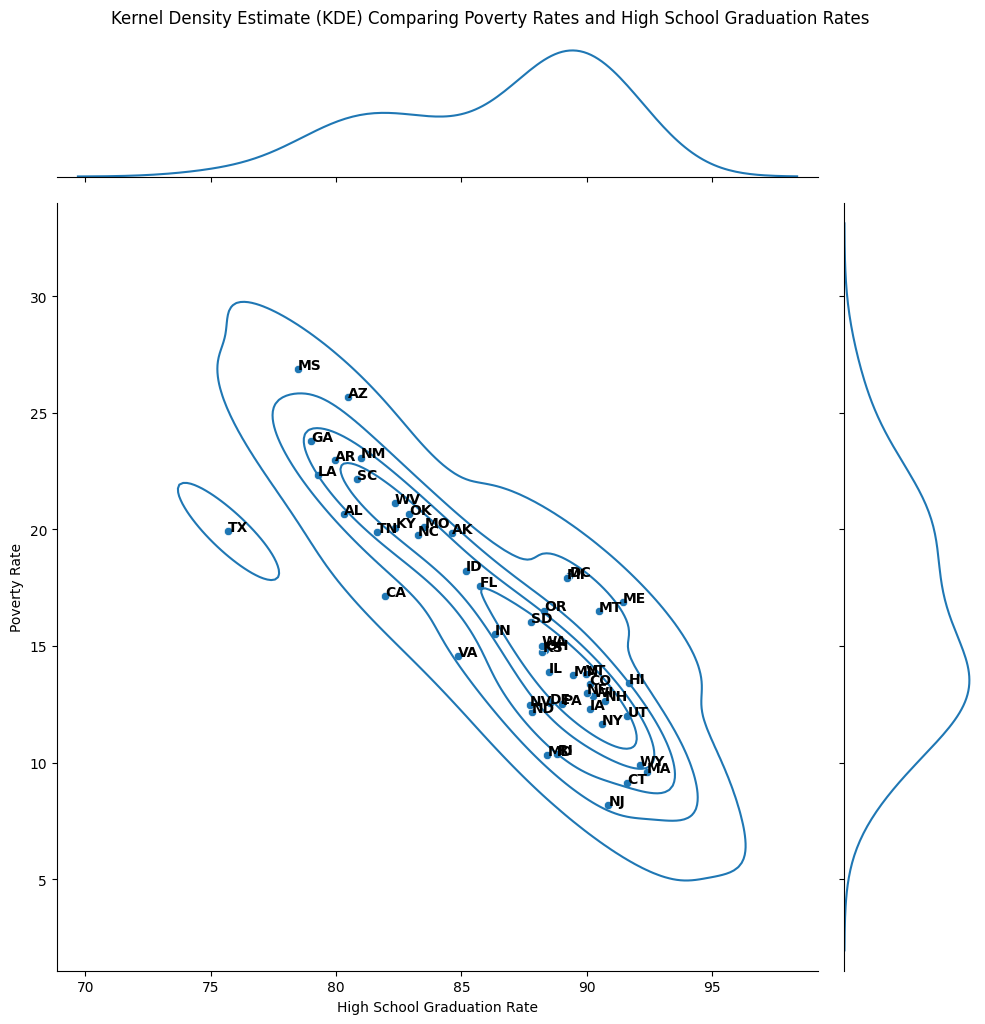

In [70]:
plt.figure(figsize=(24, 10))
ax = sns.jointplot(df_merged_poverty_graduation, x="percent_completed_hs", y="poverty_rate", kind='kde', levels=6, height=10)
ax1 = ax.plot_joint(sns.scatterplot)

ax.fig.suptitle('Kernel Density Estimate (KDE) Comparing Poverty Rates and High School Graduation Rates', y=1.02)

for line in range(0, df_merged_poverty_graduation.shape[0]):
     ax.ax_joint.text(df_merged_poverty_graduation.percent_completed_hs[line],
                      df_merged_poverty_graduation.poverty_rate[line],
                      df_merged_poverty_graduation['Geographic Area'][line],
                      horizontalalignment='left',
                      size='medium',
                      color='black',
                      weight='semibold')

plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

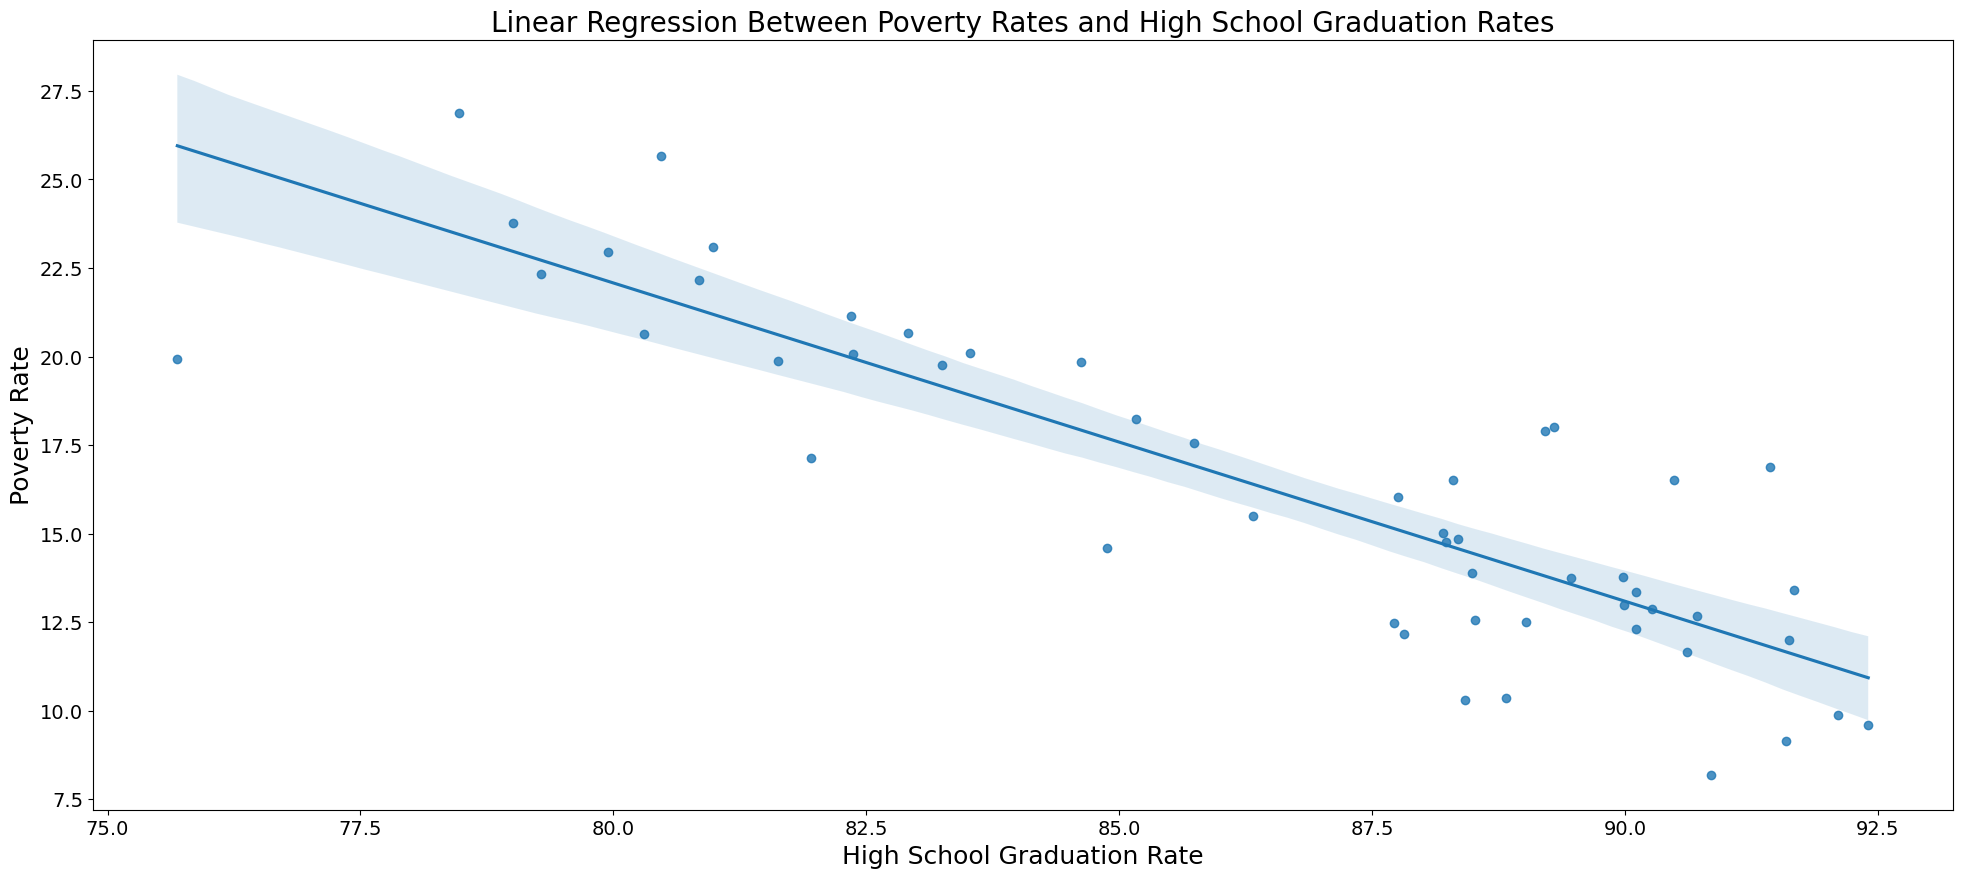

In [71]:
plt.figure(figsize=(24, 10))
sns.regplot(data=df_merged_poverty_graduation, x="percent_completed_hs", y="poverty_rate")

plt.xlabel("High School Graduation Rate", fontsize=18)
plt.ylabel("Poverty Rate", fontsize=18)
plt.title('Linear Regression Between Poverty Rates and High School Graduation Rates', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [72]:
cols = ['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce')
df_share_race_city.dropna(inplace=True)
df_state_races = df_share_race_city.groupby('Geographic area')[cols].mean().reset_index()
df_state_races.rename(columns={'share_white': 'White', 'share_black': 'Black', 'share_native_american': 'Native American', 'share_asian': 'Asian', 'share_hispanic': 'Hispanic'}, inplace=True)

In [73]:
fig = px.bar(df_state_races,
    x="Geographic area",
    y=['White', 'Black', 'Native American', 'Asian', 'Hispanic'],
    title="Racial Makeup of Each US State",
    labels={"value": "Population Percentage by Race", 'variable': 'Race', 'Geographic area': 'State'},
    barmode="stack",
)
fig.update_xaxes(tickangle=0)

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [74]:
df_fatalities_by_race = df_fatalities[df_fatalities['race'].notna()]
df_fatalities_by_race = df_fatalities_by_race['race'].value_counts()

In [75]:
fig = px.pie(names=df_fatalities_by_race.index,
             values=df_fatalities_by_race.values,
             title="Deaths by Race",
             hole=0.4,)

fig.update_traces(textfont_size=15, labels=['White', 'Black', 'Native American', 'Asian', 'Hispanic'])

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [76]:
df_deaths_by_gender = df_fatalities['gender'].value_counts()

In [77]:
fig = px.bar(df_deaths_by_gender, x=df_deaths_by_gender.index,
             y=df_deaths_by_gender.values,
             color=df_deaths_by_gender.index,
             title="Deaths by Gender")
fig.update_xaxes(title_text='Gender', tickvals=[0, 1], ticktext=['MEN', 'WOMEN'])
fig.update_yaxes(title_text='Death Count')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [78]:
df_age_manner_of_death = df_fatalities[df_fatalities['age'].notna()]
df_age_manner_of_death = df_age_manner_of_death.groupby('gender')[['age', 'manner_of_death']].value_counts().reset_index(name='count')
df_age_manner_of_death['gender'].replace({'M': 'Man', 'F': 'Woman'}, inplace=True)

In [79]:
fig = px.box(df_age_manner_of_death, x='manner_of_death', y='age', color='gender', color_discrete_map={'Woman': 'red', 'Man': 'blue'})
fig.update_layout(
    title="Manner of Death Compared to Gender and Age",
    xaxis_title="Manner of Death",
    yaxis_title="Age",
    legend_title="Gender",
)
fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [80]:
df_armed = df_fatalities[df_fatalities['armed'].notna()]
unarmed_percentage = ((df_armed['armed'] == 'unarmed').sum() / df_armed['armed'].value_counts().sum()) * 100
df_people_armed = df_armed['armed'].value_counts()
print(f"Armed people killed: {round(100 - unarmed_percentage)}%")

Armed people killed: 93%


In [81]:
fig = px.bar(df_people_armed, x=df_people_armed.index, y=df_people_armed.values, log_y=True, color=df_people_armed.values)

fig.update_layout(
    title="Type of Weapon",
    xaxis_title="Weapon",
    yaxis_title="Count",
)

fig.show()

In [82]:
people_with_guns = df_people_armed['gun']
people_unarmed = df_people_armed['unarmed']
print(f'People with guns killed by the police: {people_with_guns}')
print(f'People unarmed killed by the police: {people_unarmed}')

People with guns killed by the police: 1398
People unarmed killed by the police: 171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [83]:
df_fatalities['age'] = pd.to_numeric(df_fatalities['age'], errors='coerce')
df_fatalities['race'].replace({'W': 'White', 'B': 'Black', 'N': 'Native American', 'A': 'Asian', 'H': 'Hispanic', 'O': 'Other'}, inplace=True)
df_deaths_by_age = df_fatalities.dropna(subset=['age'])

deaths_under_25 = df_deaths_by_age[df_deaths_by_age['age'] < 25].shape[0]
total_deaths = df_deaths_by_age.shape[0]
percentage_under_25 = round((deaths_under_25 / total_deaths) * 100)

print(f'People killed under 25 years old: {percentage_under_25}%')

People killed under 25 years old: 18%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

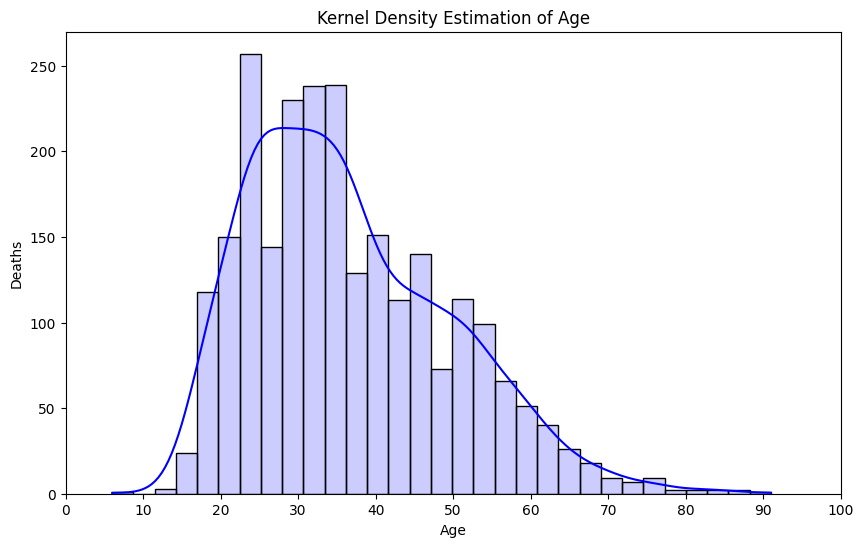

In [84]:
plt.figure(figsize=(10, 6))

sns.histplot(df_deaths_by_age, x='age', kde=True, color='blue', alpha=0.2)

plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('Kernel Density Estimation of Age')
plt.xticks(range(0, 101, 10))

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

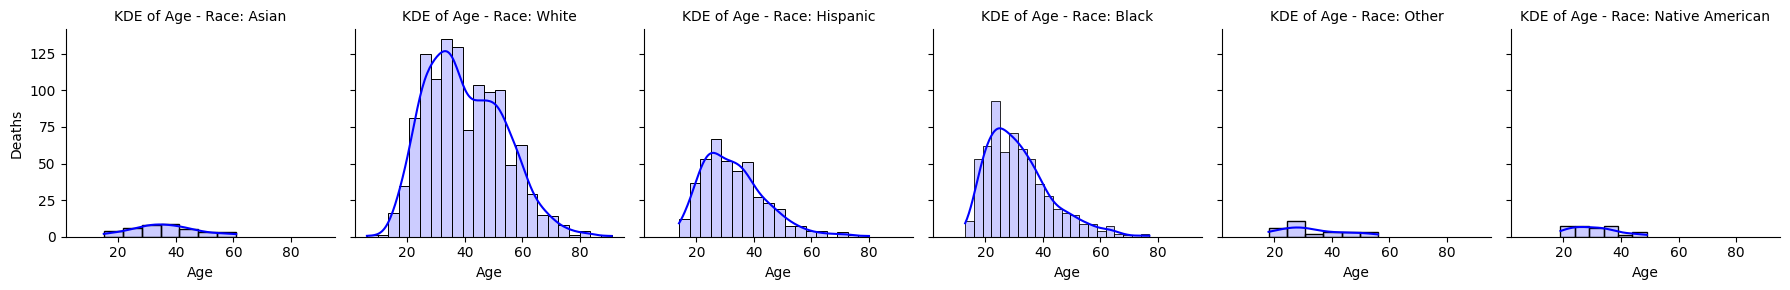

In [85]:
graph = sns.FacetGrid(df_deaths_by_age, col="race")
graph.map(sns.histplot, 'age', kde=True, color='blue', alpha=0.2)

graph.set_axis_labels('Age', 'Deaths')
graph.set_titles('KDE of Age - Race: {col_name}')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [86]:

deaths_by_race = df_fatalities[df_fatalities['race'].notna()]
deaths_by_race = deaths_by_race['race'].value_counts()

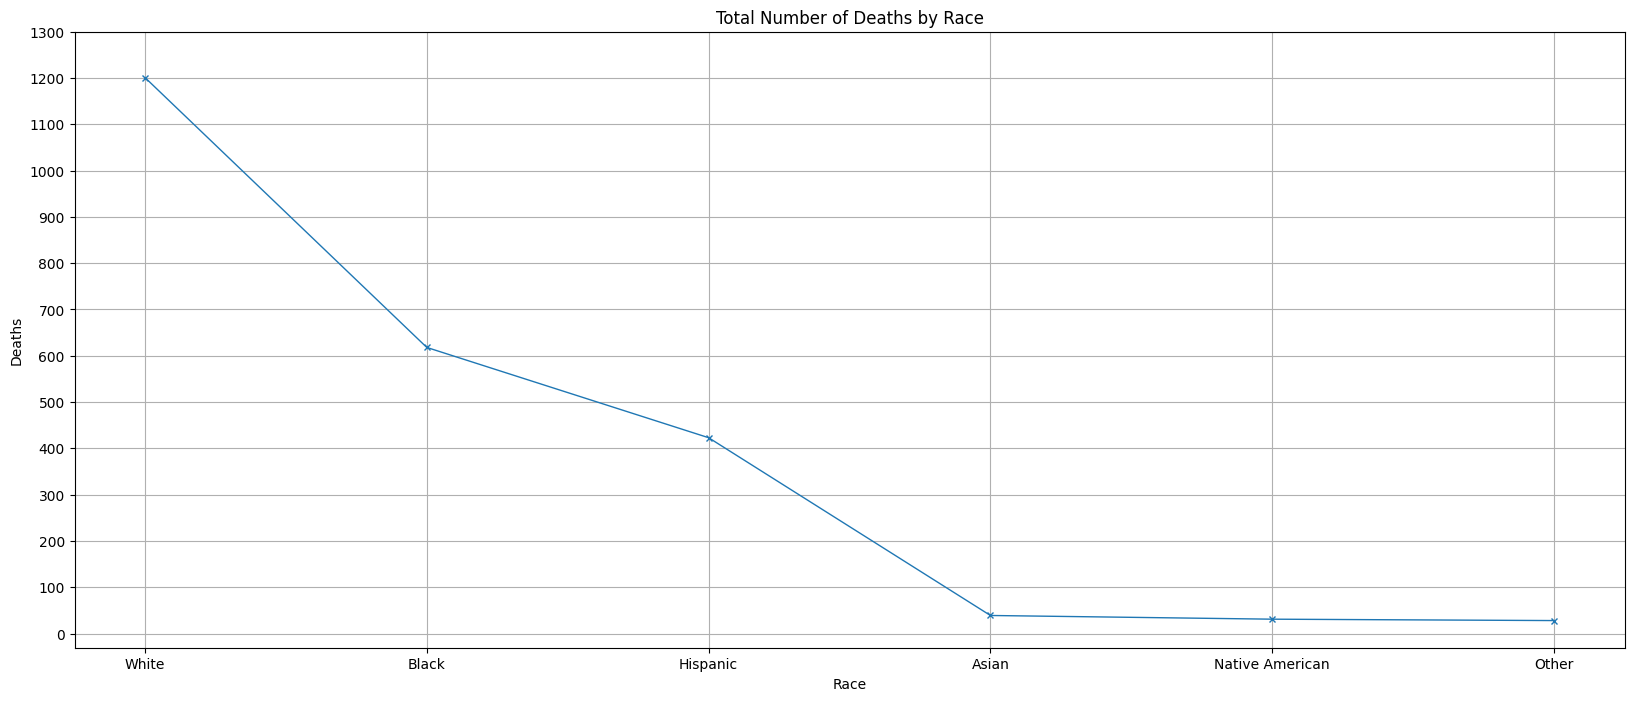

In [87]:
plt.figure(figsize=(20, 8))
plt.plot(deaths_by_race, linestyle='-', marker='x', markersize=5, linewidth=1)
plt.xlabel("Race")
plt.ylabel("Deaths")
plt.title("Total Number of Deaths by Race")
plt.grid(True)
plt.yticks(range(0, deaths_by_race.max() + 100, 100))
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [88]:
deaths_with_mental_illness = df_fatalities['signs_of_mental_illness'].sum()
total_deaths = df_fatalities['signs_of_mental_illness'].count()
death_percentage_with_mental_illness = deaths_with_mental_illness/total_deaths * 100

In [89]:
print(f"Percentage of deaths with signs of mental illness: {round(death_percentage_with_mental_illness)}%")

Percentage of deaths with signs of mental illness: 25%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [91]:
top_10_cities_with_most_deaths = df_fatalities[['state', 'city']].value_counts().head(10).reset_index(name='count')

In [100]:

fig = px.bar(top_10_cities_with_most_deaths, x='city', y='count')

fig.update_layout(
    title="Top 10 Cities by Police Caused Deaths",
    xaxis_title="City",
    yaxis_title="Total Deaths in Each City",
)

fig.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [130]:
merged_df = top_10_cities_with_most_deaths.merge(df_fatalities, on=['state', 'city'])
merged_df = merged_df.groupby(['state', 'city', 'count'])['race'].value_counts(dropna=False).reset_index(name='death_race')
merged_df['death_race'] = round((merged_df['death_race'] / merged_df['count']) * 100)
merged_df = merged_df[merged_df['race'].isin(["Asian", "Black", "Hispanic", "Native American", "White"])]
merged_df.dropna(subset=['death_race'], inplace=True)

In [131]:
cities = '|'.join(top_10_cities_with_most_deaths['city'].tolist())
top_10_cities_race = df_share_race_city[df_share_race_city['City'].str.contains(cities, case=False)]
for city in top_10_cities_with_most_deaths['city']:
    city_match_mask = top_10_cities_race['City'].str.contains(city, case=False)
    top_10_cities_race.loc[city_match_mask, 'City'] = city

In [132]:
top_10_cities_race = top_10_cities_race.groupby(['Geographic area', 'City']).mean().reset_index()
top_10_cities_race = top_10_cities_race.merge(top_10_cities_with_most_deaths, left_on=['Geographic area', 'City'], right_on=['state', 'city'])
top_10_cities_race.drop(['Geographic area', 'City', 'count'], axis=1, inplace=True)


In [133]:
long_df = top_10_cities_race.melt(id_vars=["state", "city"], var_name="race", value_name="race_share")
race_mapping = {
    "share_white": "White",
    "share_black": "Black",
    "share_native_american": "Native American",
    "share_asian": "Asian",
    "share_hispanic": "Hispanic"
}
long_df['race'] = long_df['race'].replace(race_mapping)

long_df = long_df.merge(merged_df[['state', 'city', 'race', 'death_race']], on=['state', 'city', 'race'], how='left')

long_df.dropna(subset=['race_share', 'death_race'], inplace=True)

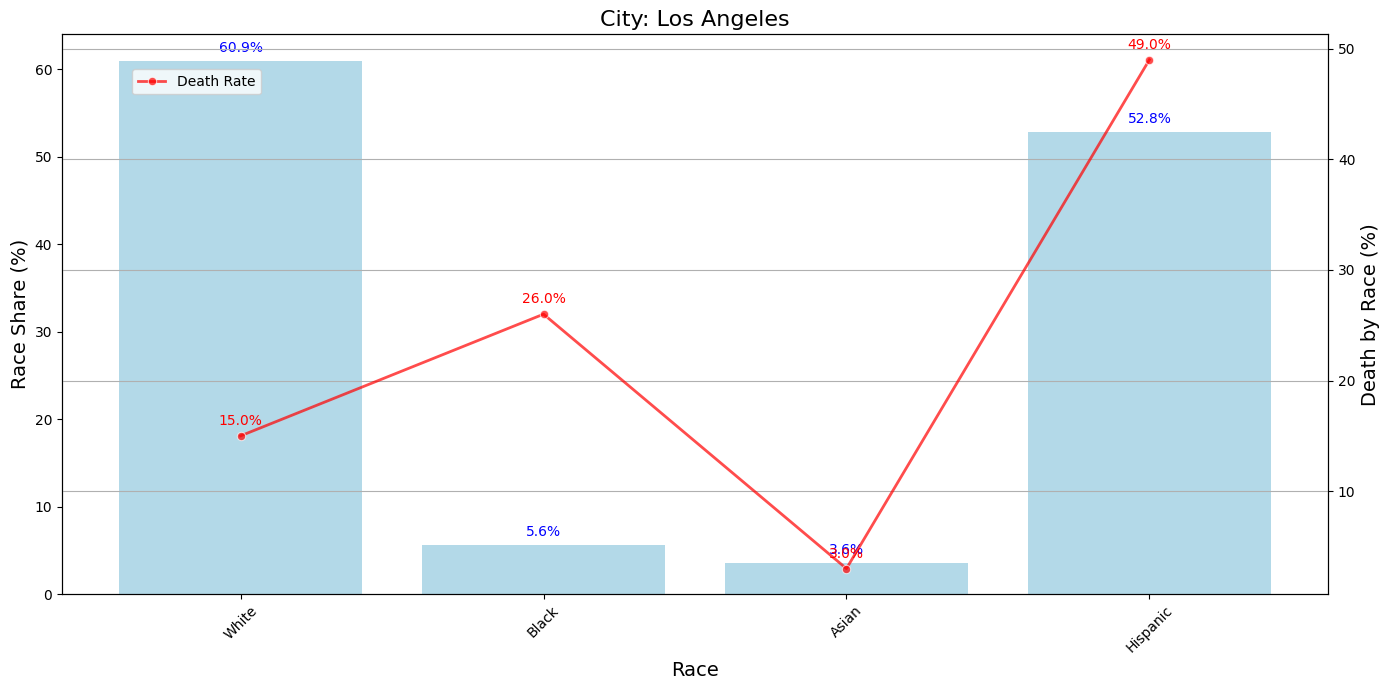

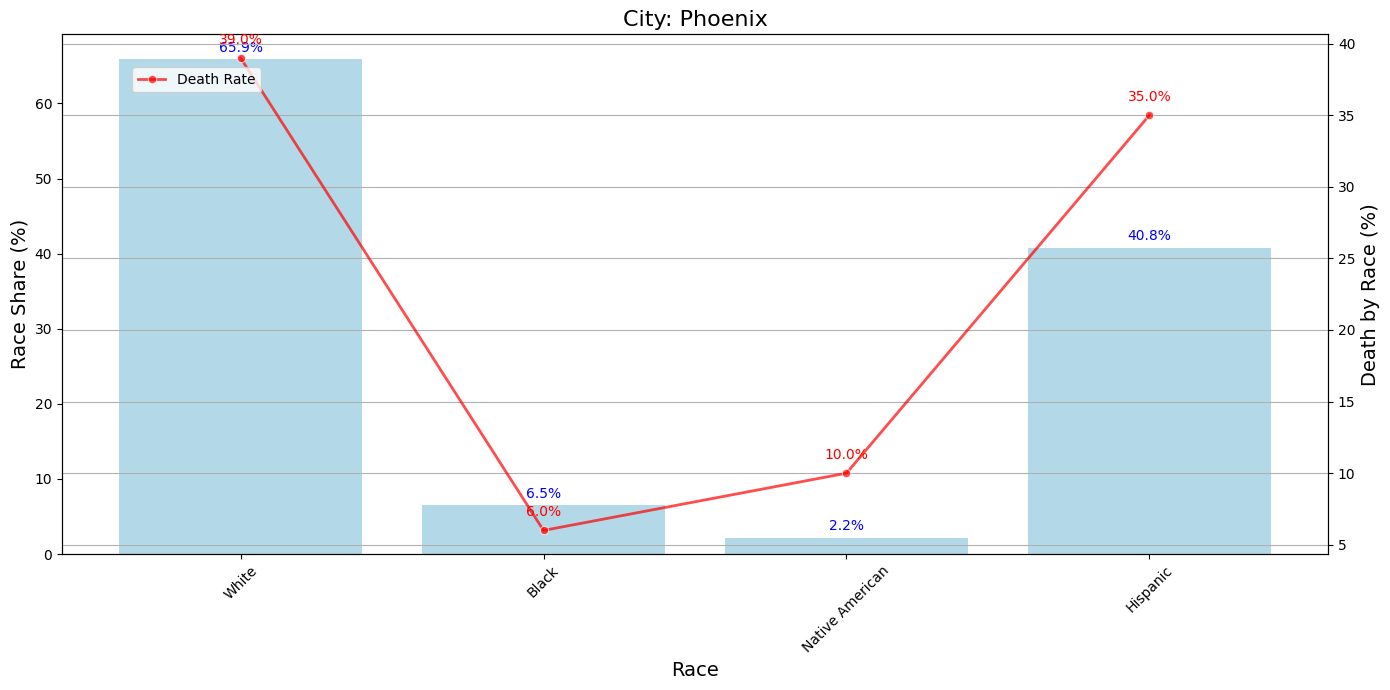

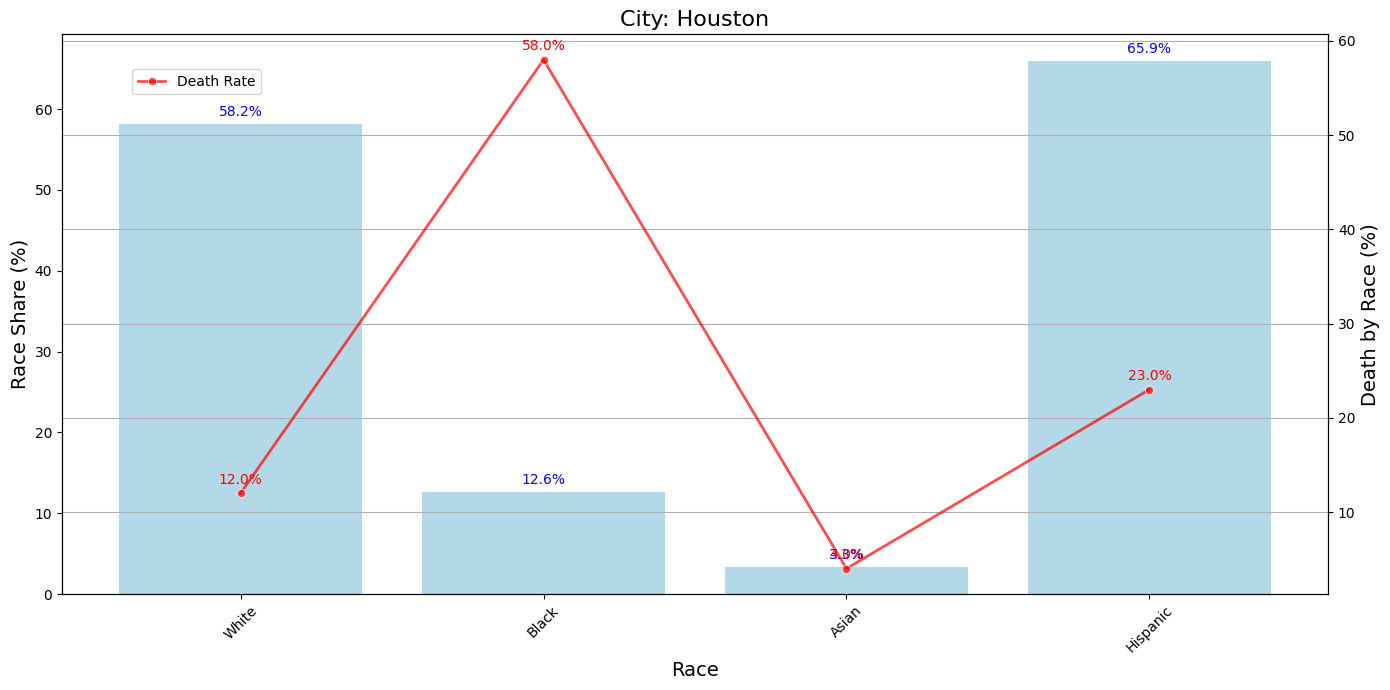

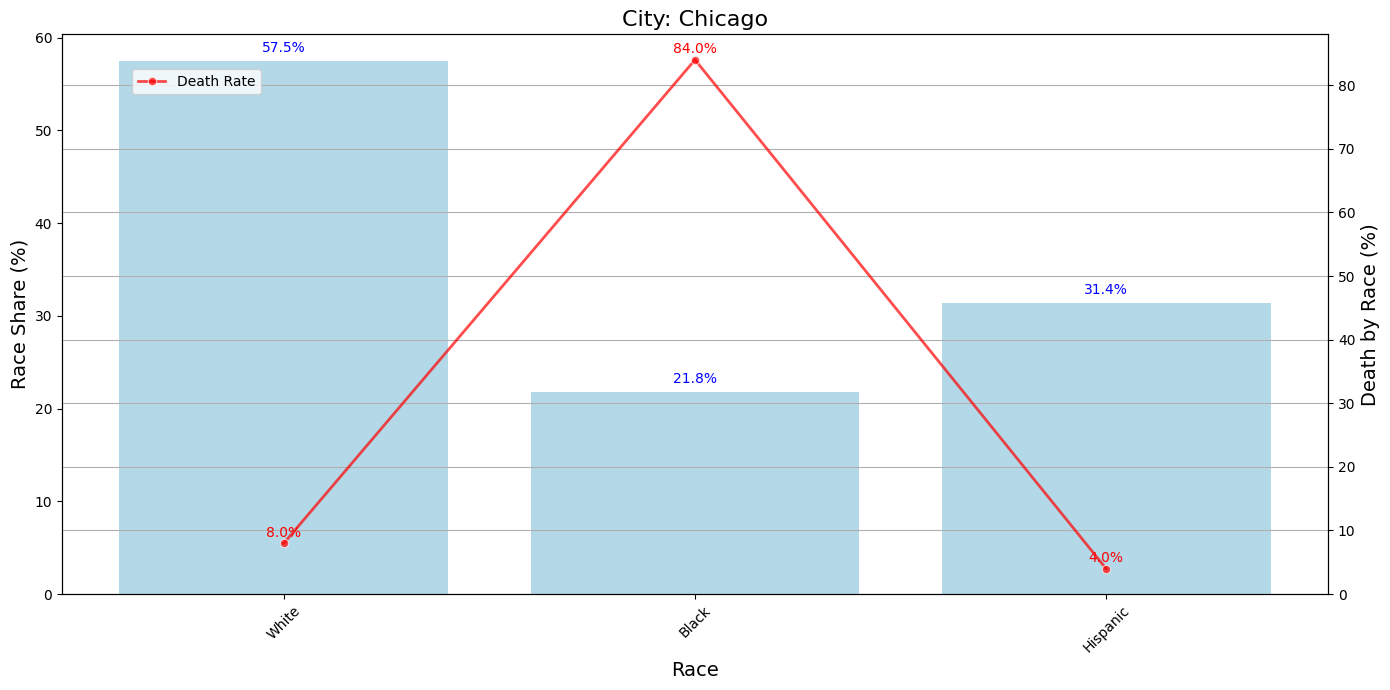

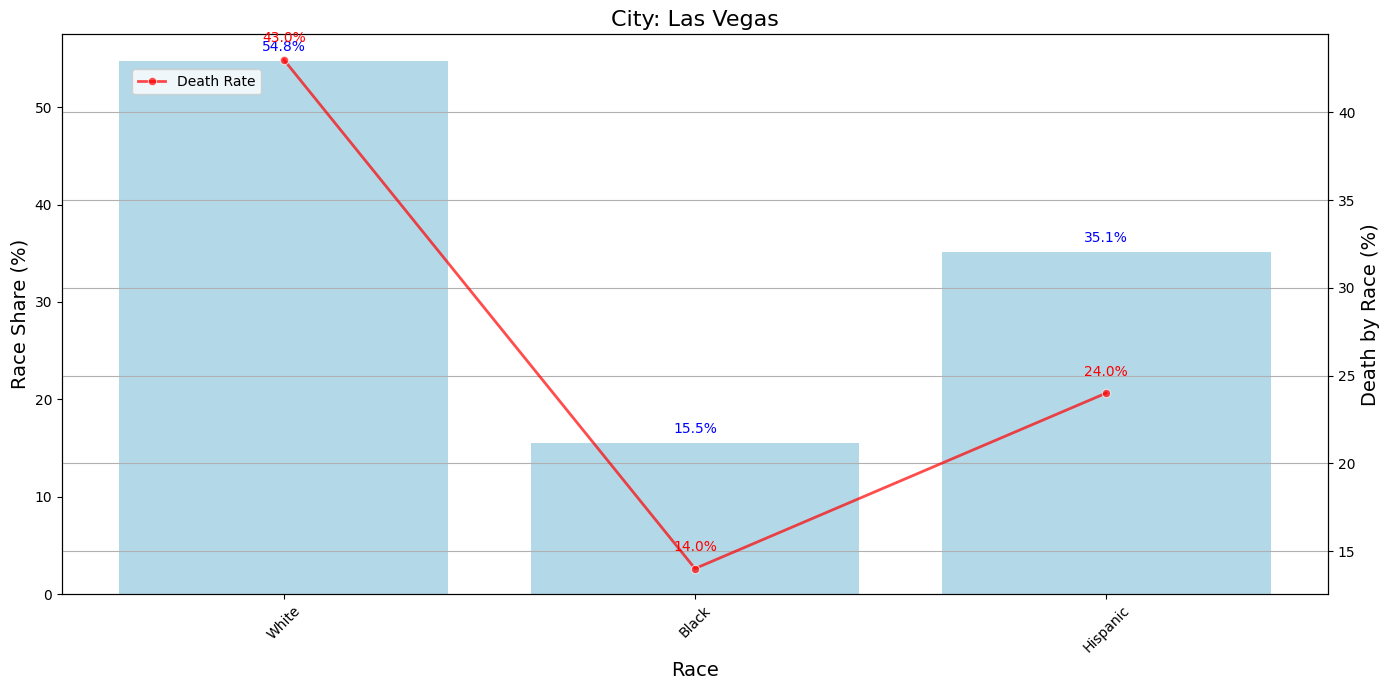

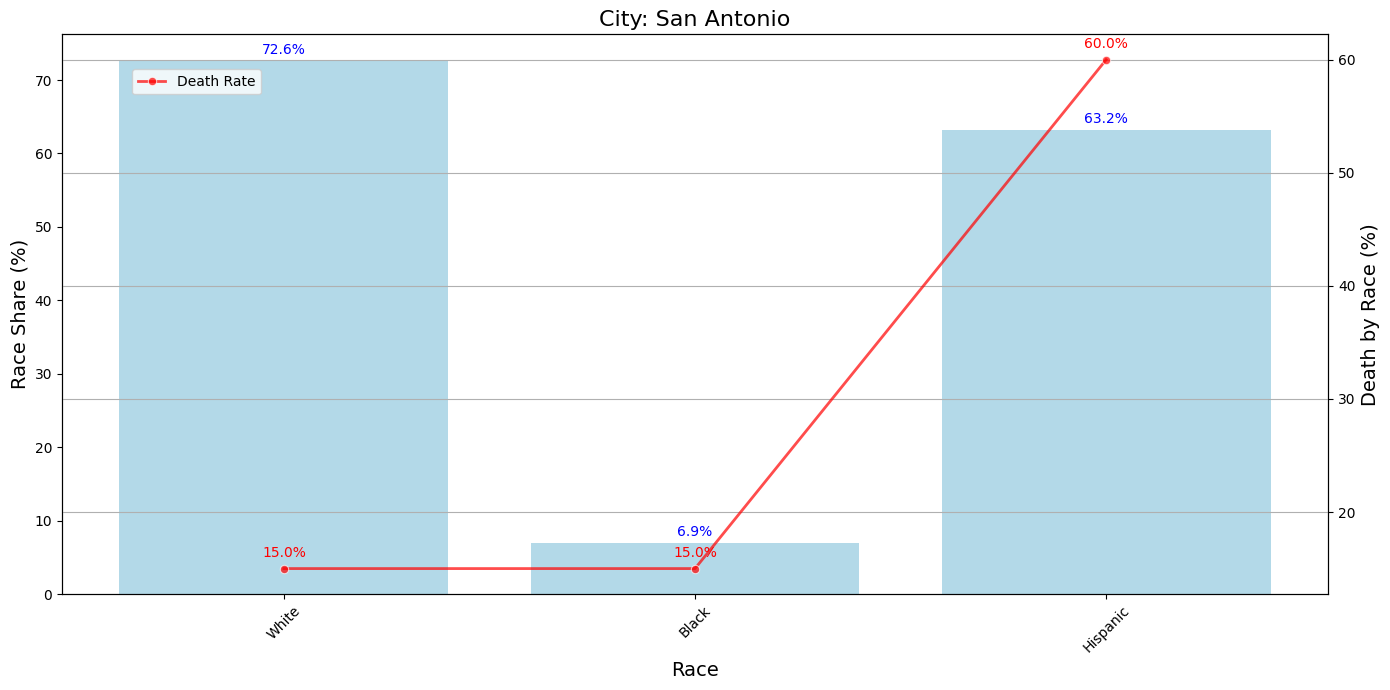

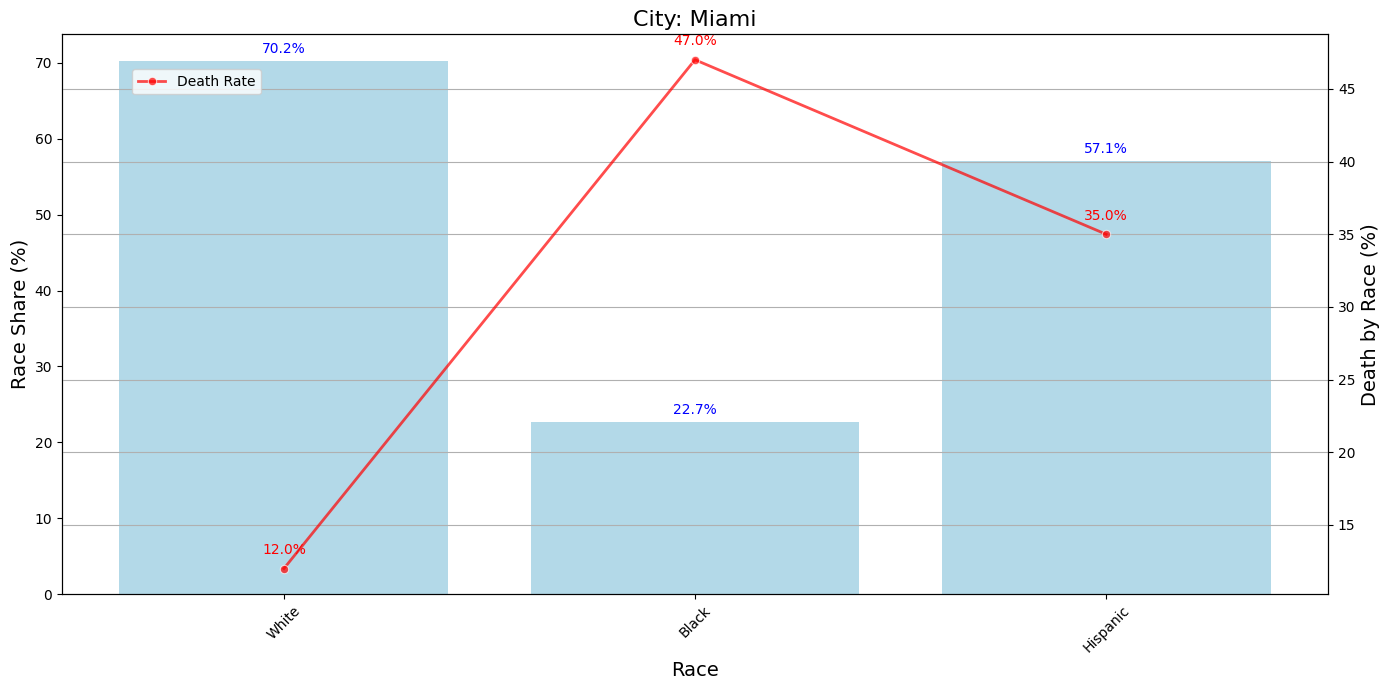

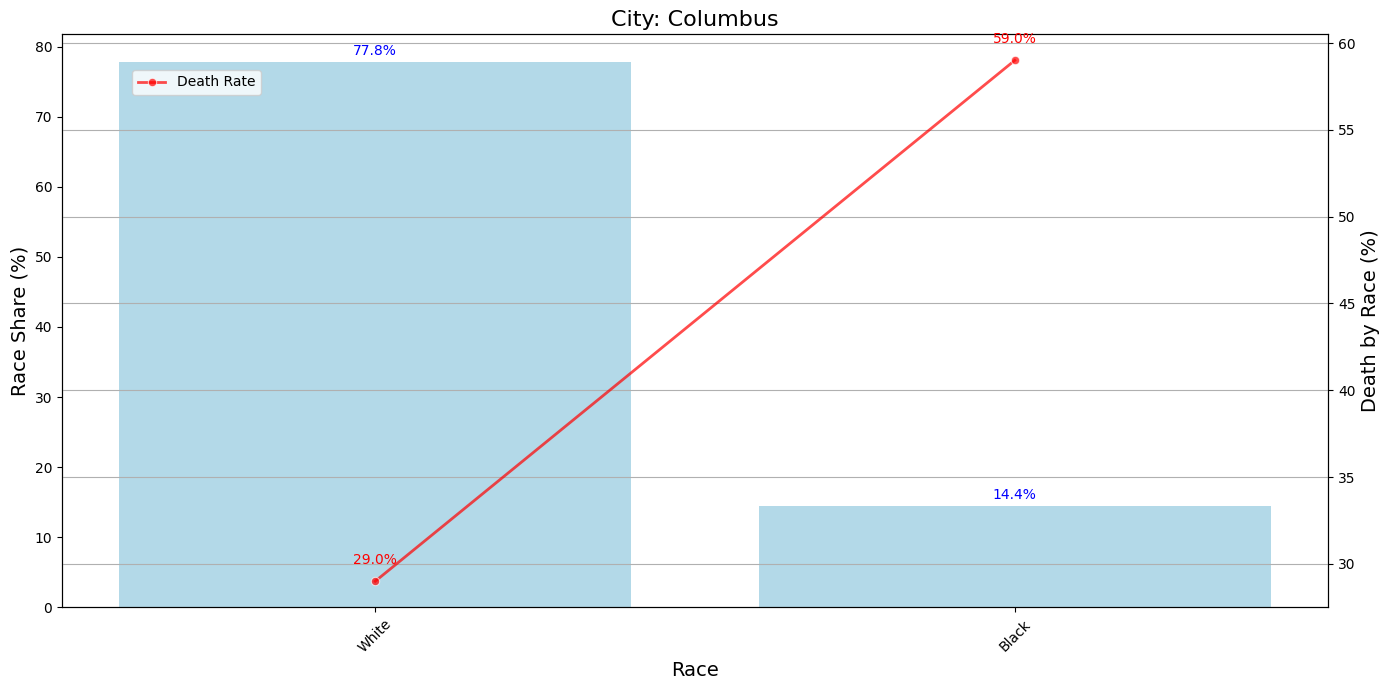

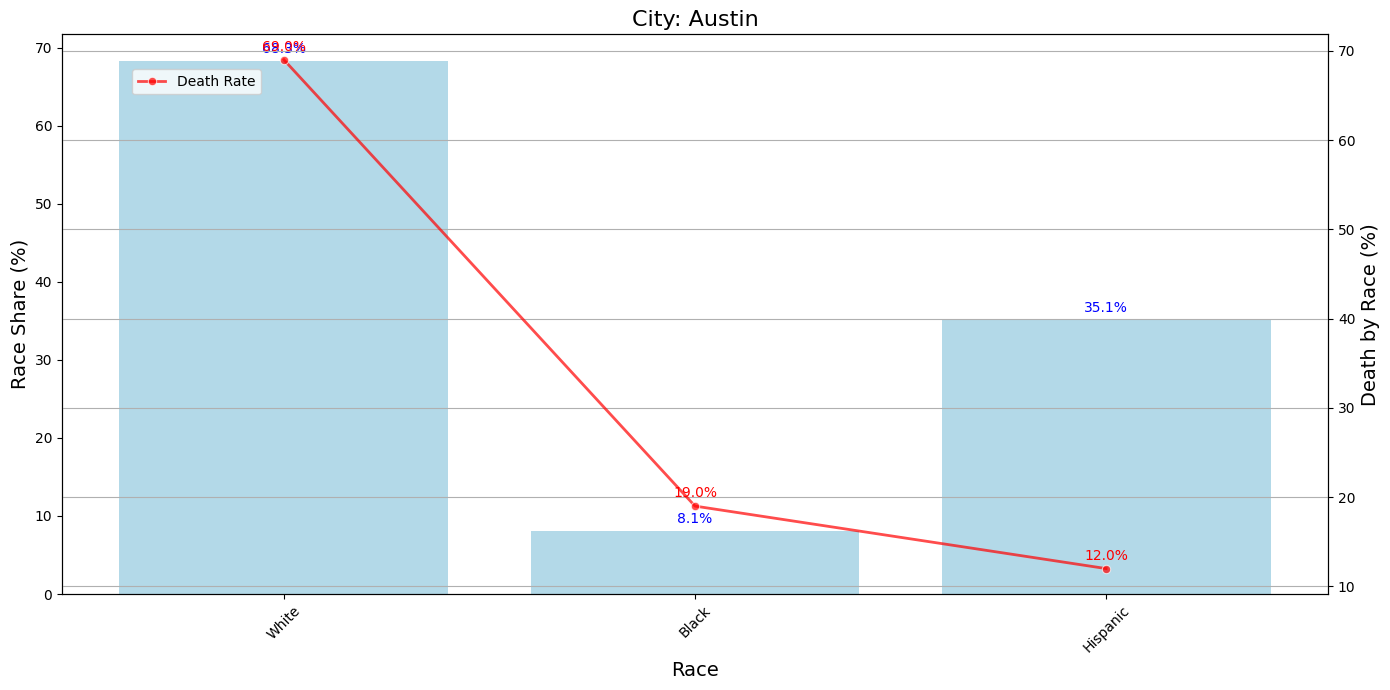

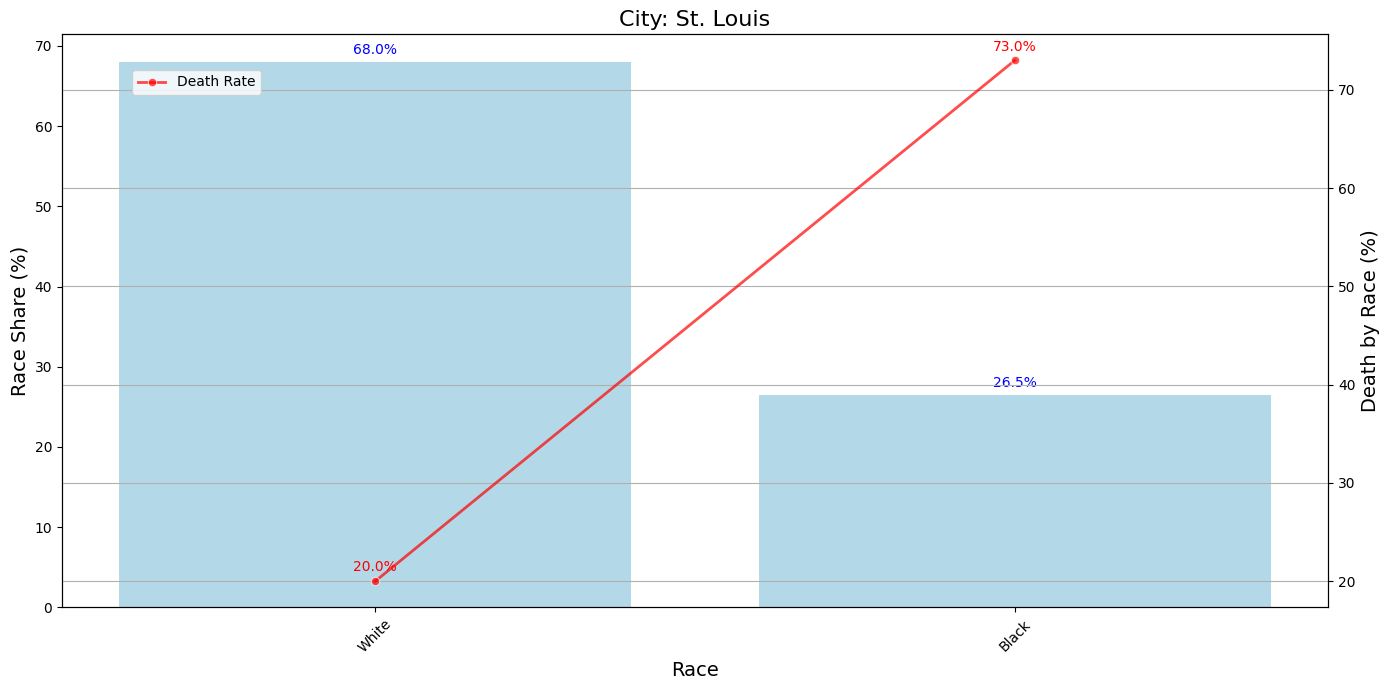

In [134]:
for city in top_10_cities_with_most_deaths['city']:

    fig, ax = plt.subplots(figsize=(14, 7))

    sns.barplot(data=long_df[long_df['city'] == city], x='race', y='race_share', ax=ax, color='skyblue', alpha=0.7)
    for i in range(long_df[long_df['city'] == city].shape[0]):
        ax.text(i, long_df[long_df['city'] == city]['race_share'].iloc[i] + 1,
                f"{long_df[long_df['city'] == city]['race_share'].iloc[i]:.1f}%", ha='center', color='blue')

    ax2 = ax.twinx()
    sns.lineplot(data=long_df[long_df['city'] == city], x='race', y='death_race', ax=ax2, color='red', alpha=0.7, marker='o', linewidth=2, label='Death Rate')
    for i in range(long_df[long_df['city'] == city].shape[0]):
        ax2.text(i, long_df[long_df['city'] == city]['death_race'].iloc[i] + 1,
                 f"{long_df[long_df['city'] == city]['death_race'].iloc[i]:.1f}%", ha='center', color='red')

    ax2.grid(None)

    ax.set_xlabel("Race", fontsize=14)
    ax.set_ylabel("Race Share (%)", fontsize=14)
    ax2.set_ylabel("Death by Race (%)", fontsize=14)

    ax.tick_params(axis='x', rotation=45)
    ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

    plt.title(f'City: {city}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [135]:
deaths_by_state = df_fatalities.groupby('state')['id'].count().reset_index(name='count')

In [136]:
fig = px.choropleth(deaths_by_state, locations='state', color='count', locationmode="USA-states", scope="usa", title='Police Killings by US State', color_continuous_scale='Reds')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [142]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%Y-%m-%d')

In [145]:
deaths_over_time = df_fatalities.groupby('date').size().reset_index(name='count').sort_values('date')
deaths_over_time['year'] = deaths_over_time['date'].dt.year
deaths_over_time['month'] = deaths_over_time['date'].dt.month
deaths_over_time = deaths_over_time.groupby(['year', 'month'])['count'].sum().reset_index()


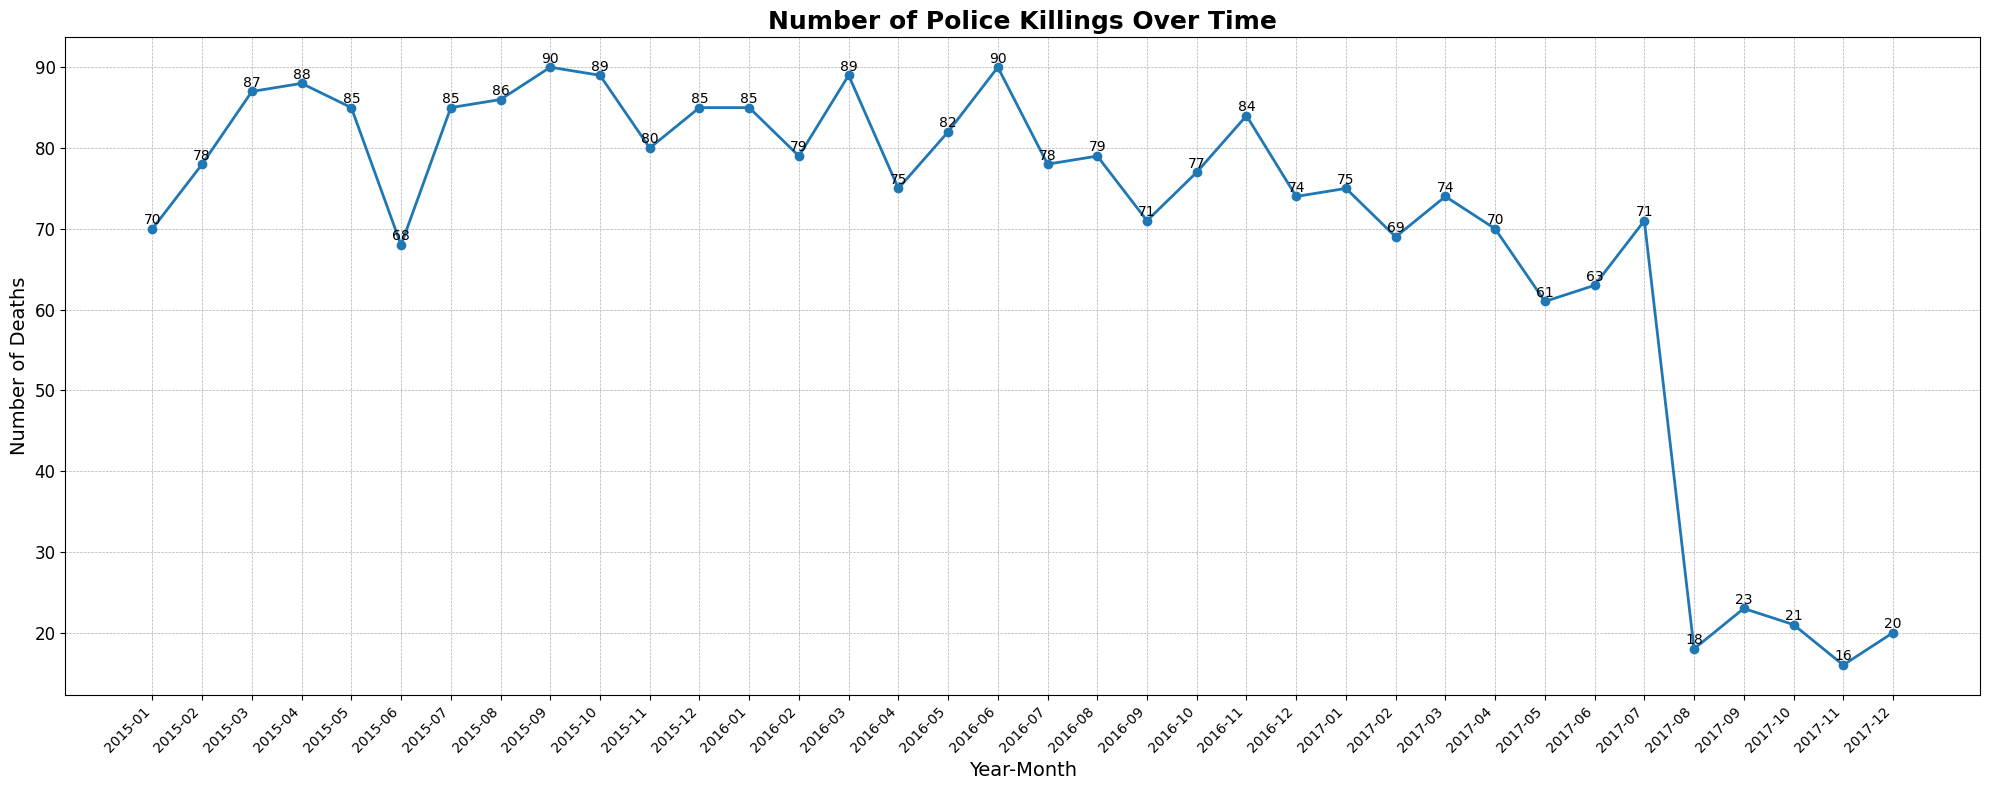

In [147]:

plt.figure(figsize=(20, 8), facecolor='white')
plt.plot(deaths_over_time.index, deaths_over_time['count'], marker='o', linestyle='-', color='tab:blue', linewidth=2, markersize=6)

plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.title('Number of Police Killings Over Time', fontsize=18, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(deaths_over_time.index, deaths_over_time.apply(lambda x: f"{x['year']}-{x['month']:02d}", axis=1), rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

for i, row in deaths_over_time.iterrows():
    plt.text(i, row['count'] + 0.2, row['count'], ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).